In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 100)

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


# 1. Vista Básica

In [3]:
#Tipos
data.dtypes

id          int64 
keyword     object
location    object
text        object
target      int64 
dtype: object

In [4]:
#Forma
data.shape

(7613, 5)

In [5]:
#Cantidades
data.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

Vemos que hay 61 tweets que no tienen una 'keyword' asociada.

In [6]:
#Traigo todos los que no tienen un keyword
sin_keyword = data.loc[data['keyword'].isna(),:]
sin_keyword

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [7]:
#De estos, veo cuantos son falsos
sin_keyword['target'].value_counts()

1    42
0    19
Name: target, dtype: int64

Vemos que 42 de los 61 tweets identificados fueron considerados como 'verdaderos'

In [8]:
#Veo unicas
data.loc[data['keyword'].notna(),:]['keyword'].unique().size

221

Vemos que en los 7613 tweets hay solo 221 keywords unicas.

# 2. Limpieza

# 2.1 Busco candidatos para las keywords faltantes

2.1.1 Armo una lista de las keywords que aparecen en 'train'

In [9]:
keywords_unicas = data.loc[data['keyword'].notna(),:]['keyword'].unique()

#Obtenemos una lista de keywords unicas y reemplazamos los %20 por " "

keywords_unicas = keywords_unicas.tolist()
lista_aux = []
for keyword in keywords_unicas:
    keyword = keyword.replace("%20"," ")
    lista_aux.append(keyword)
keywords_unicas = lista_aux


2.1.2 Intento encontrar keywords en el texto de las filas sin keyword

In [10]:
candidatos = []
texts = sin_keyword['text'].tolist()
for text in texts:
    found=""
    for kw in keywords_unicas:
        if kw in text.lower():
            if found > "":
                found = found + ','
            found = found + kw
    candidatos.append(found)
    
sin_keyword['candidatos'] = candidatos
sin_keyword

,id,keyword,location,text,target,candidatos
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,earthquake
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"fire,forest fire"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"evacuation,fire,wildfire"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,"fire,smoke,wildfire"
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,"fire,wildfire"
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,"disaster,flood,flooding"
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,fire
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,"emergency,evacuation"
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,tornado


2.1.3 Selecciono y asigno keywords a los tweets que no tienen keyword

In [11]:
#Me quedo con aquellas filas a las que se le puede asignar un keyword
para_asignar_keyword = sin_keyword.loc[sin_keyword['candidatos']>"",:]

#Dada la poca cantidad de casos para tratar, selecciono la keyword mas significativa para cada uno, en orden
keywords_a_asignar = ['earthquake','forest fire','evacuation','wildfire',
                      'wildfire','wildfire','flooding','fire','evacuation',
                      'tornado','heat wave','flooding','flooding','flood','crash',
                      'suicide bomber','explode','flood','seismic','sirens','attack',
                      'earthquake','cyclone','heat wave','suicide bomber','loud bang',
                      'exploded','flood','thunderstorm','debris','collided','earthquake',
                      'evacuation','oil spill','siren','quarantine','evacuated','bomb',
                      'suicide bomber','tornado','bridge collapse','wild fires','volcano','collided','wildfire']

#Veo que no falte ninguna, los que pueden tener una keyword (tengan target 1 o 0) suman 45
len(keywords_a_asignar)

45

In [12]:
para_asignar_keyword['keyword']=keywords_a_asignar
para_asignar_keyword

,id,keyword,location,text,target,candidatos
0,1,earthquake,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,earthquake
1,4,forest fire,NaN,Forest fire near La Ronge Sask. Canada,1,"fire,forest fire"
2,5,evacuation,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,evacuation
3,6,wildfire,NaN,"13,000 people receive #wildfires evacuation orders in California",1,"evacuation,fire,wildfire"
4,7,wildfire,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,"fire,smoke,wildfire"
5,8,wildfire,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,"fire,wildfire"
6,10,flooding,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,"disaster,flood,flooding"
7,13,fire,NaN,I'm on top of the hill and I can see a fire in the woods...,1,fire
8,14,evacuation,NaN,There's an emergency evacuation happening now in the building across the street,1,"emergency,evacuation"
9,15,tornado,NaN,I'm afraid that the tornado is coming to our area...,1,tornado


In [13]:
data['keyword'] = data['keyword'].fillna(para_asignar_keyword['keyword'])
data.count()

id          7613
keyword     7597
location    5080
text        7613
target      7613
dtype: int64

Ahora hay 45 tweets adicionales que tienen keyword

# 3. Preparacion del Working Set

3.1 Extraigo datos a utilizar

In [14]:
data['keyword'] = data['keyword'].str.replace('%20',' ')
working_set = data[['id','keyword','target']]

#Agrego columnas
working_set['frecuencia'] = working_set.groupby('keyword')['keyword'].transform('count')
working_set['verdaderos_por_keyword'] = working_set.groupby('keyword')['target'].transform('sum')
working_set['ratio_veracidad'] = working_set.apply(lambda x: x['verdaderos_por_keyword']/x['frecuencia'], axis=1)
working_set['pct_veracidad'] = working_set.apply(lambda x: x['ratio_veracidad']*100, axis=1)
working_set['longitud_kw'] = working_set['keyword'].str.len()
working_set['complejidad'] = np.where(working_set['keyword'].str.contains(" "), 'compuesta', 'simple')

#Toques finales
working_set = working_set.drop_duplicates(['keyword'])
working_set.reset_index()
working_set.dropna(inplace=True)
working_set.sort_values(by='pct_veracidad',ascending=False, inplace=True)

In [15]:
working_set

,id,keyword,target,frecuencia,verdaderos_por_keyword,ratio_veracidad,pct_veracidad,longitud_kw,complejidad
2163,3104,debris,1,38.0,38.0,1.000000,100.000000,6.0,simple
7505,10735,wreckage,1,39.0,39.0,1.000000,100.000000,8.0,simple
2439,3503,derailment,1,39.0,39.0,1.000000,100.000000,10.0,simple
5280,7545,outbreak,1,40.0,39.0,0.975000,97.500000,8.0,simple
5242,7496,oil spill,1,39.0,38.0,0.974359,97.435897,9.0,compuesta
...,...,...,...,...,...,...,...,...,...
952,1379,body bag,0,33.0,1.0,0.030303,3.030303,8.0,compuesta
678,979,blazing,0,34.0,1.0,0.029412,2.941176,7.0,simple
5838,8344,ruin,0,37.0,1.0,0.027027,2.702703,4.0,simple
1018,1479,body bags,1,41.0,1.0,0.024390,2.439024,9.0,compuesta


# 4. Análisis

In [16]:
# 4.1 - Distribuciones

In [117]:
def plot_densidad_ind(df, column, color, xlim, xlabel, tick_step, title, pad):
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    fig, axs = plt.subplots(figsize=(20, 15),ncols=1, nrows=3, gridspec_kw={'height_ratios': [3, 3, 1]})

    ax1 = axs[0]
    ax2 = axs[1]
    ax3 = axs[2]


    # Plot 
    sns.set_color_codes("dark")
    sns.distplot(df[column], hist=False, kde=True, bins=int(50), color = color, hist_kws={'edgecolor':'black'}, ax=ax1)

    sns.stripplot(x=column, data=df, orient='h',color=color, size=5, jitter=0.5, ax=ax2)
    sns.boxplot(x=column, data=df, color=color, ax=ax3)


    ax1.legend(ncol=2, frameon=True)
    ax1.set_xticks(np.arange(0, xlim + 1, tick_step))
    ax1.set(xlim=(0, xlim), ylabel="Densidad",xlabel=xlabel)


    ax2.legend(ncol=2, frameon=True)
    ax2.set_xticks(np.arange(0, xlim + 1, tick_step))
    ax2.set(xlim=(0, xlim), ylabel="",xlabel=xlabel)


    ax3.legend(ncol=2, frameon=True)
    ax3.set_xticks(np.arange(0, xlim + 1, tick_step))
    ax3.set(xlim=(0, xlim), ylabel="",xlabel=xlabel)

    fig.suptitle(title, fontsize=32)
    fig.tight_layout(pad=pad)
    #sns.despine(left=True, bottom=True)

4.1.1 Frecuencia de Keywords

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


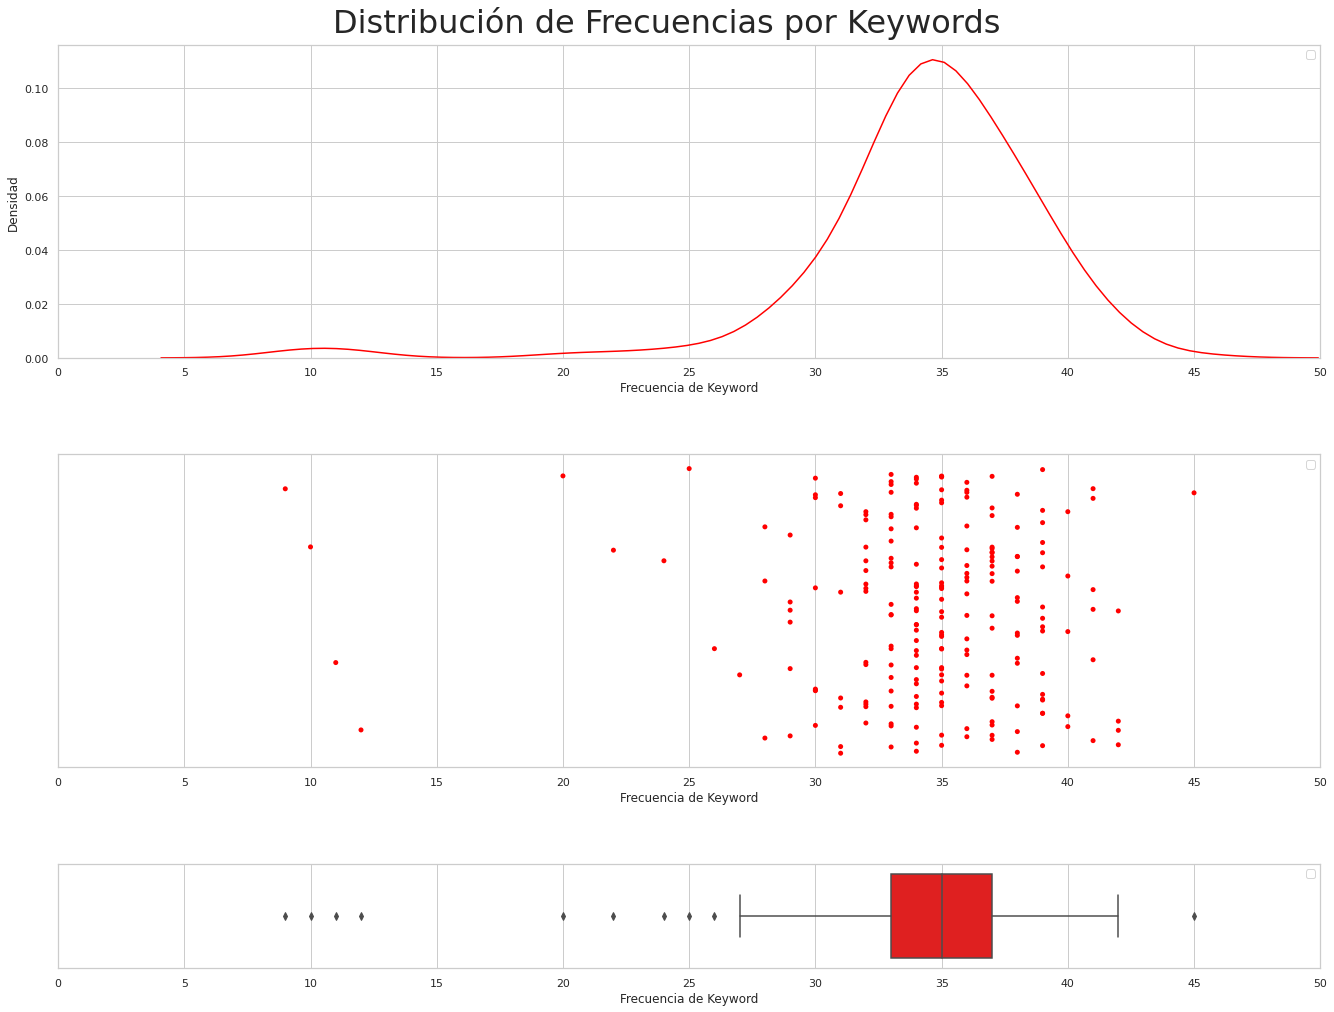

In [118]:
plot_densidad_ind(working_set, 'frecuencia', 'red', 50, 'Frecuencia de Keyword', 5, "Distribución de Frecuencias por Keywords", 5.0)

4.1.2 Longitud de Keywords

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


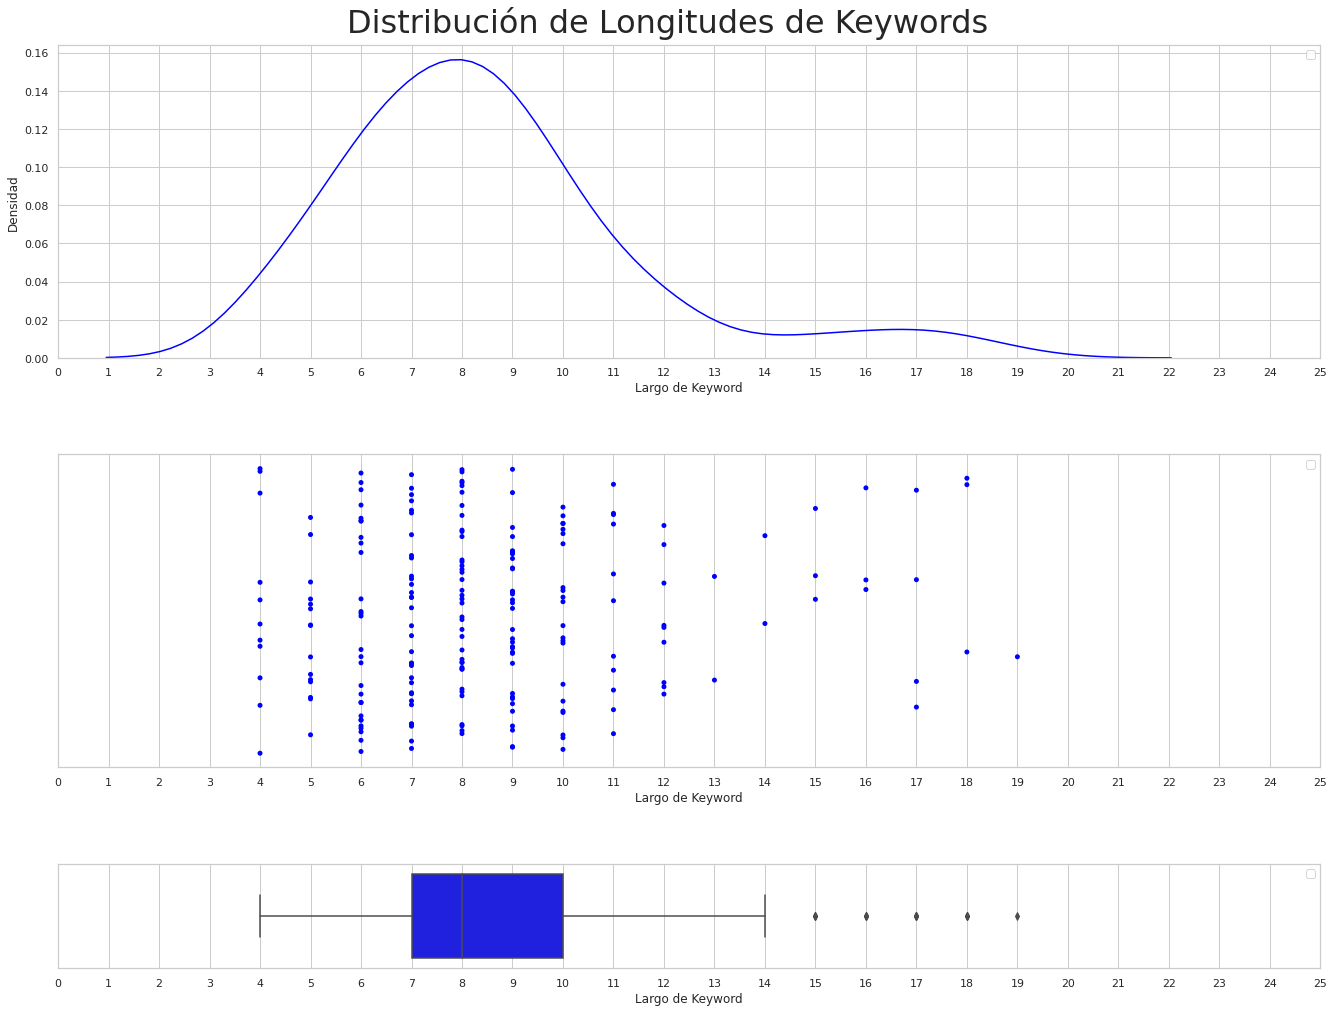

In [119]:
plot_densidad_ind(working_set, 'longitud_kw', 'blue', 25, 'Largo de Keyword', 1, "Distribución de Longitudes de Keywords", 5.0)

4.1.3 Cantidad de Verdaderos por Keyword

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


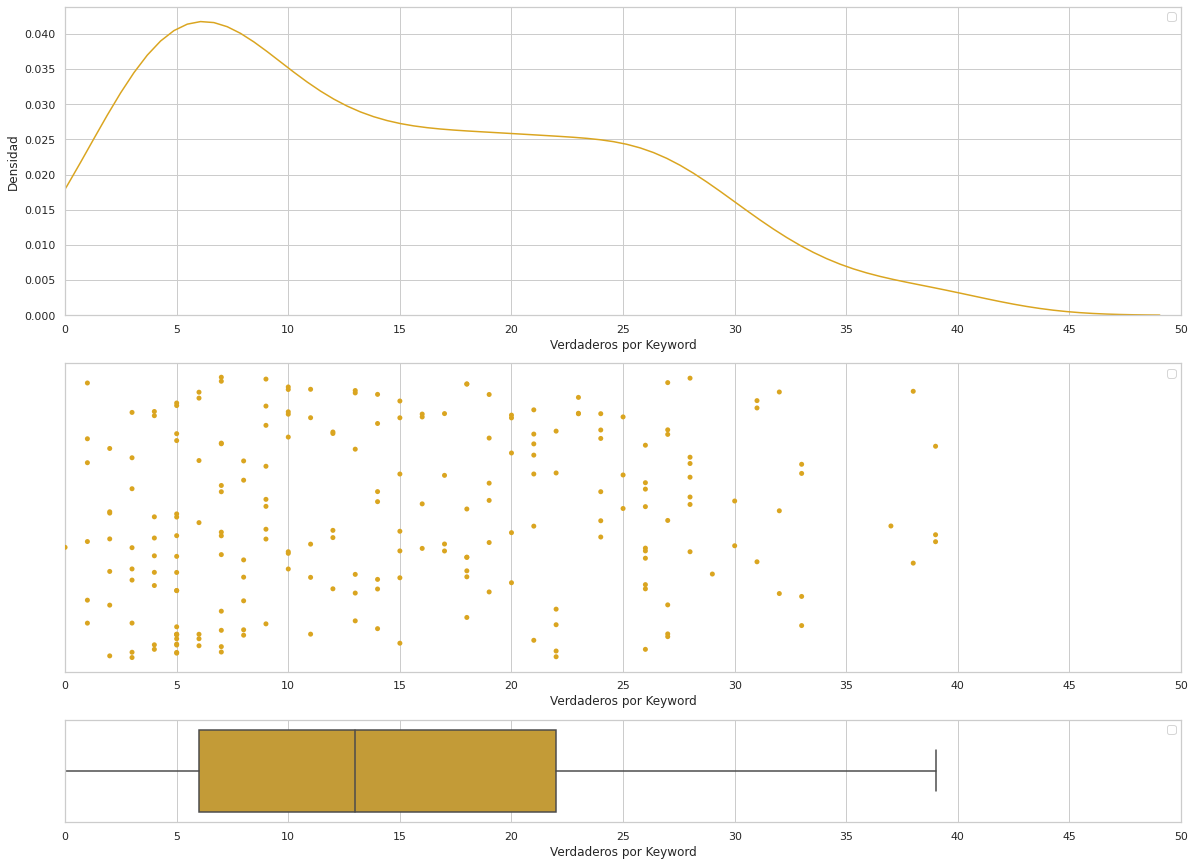

In [20]:
plot_densidad_ind(working_set, 'verdaderos_por_keyword', 'goldenrod', 50, 'Verdaderos por Keyword', 5)

4.1.4 Porcentaje de Veracidad

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


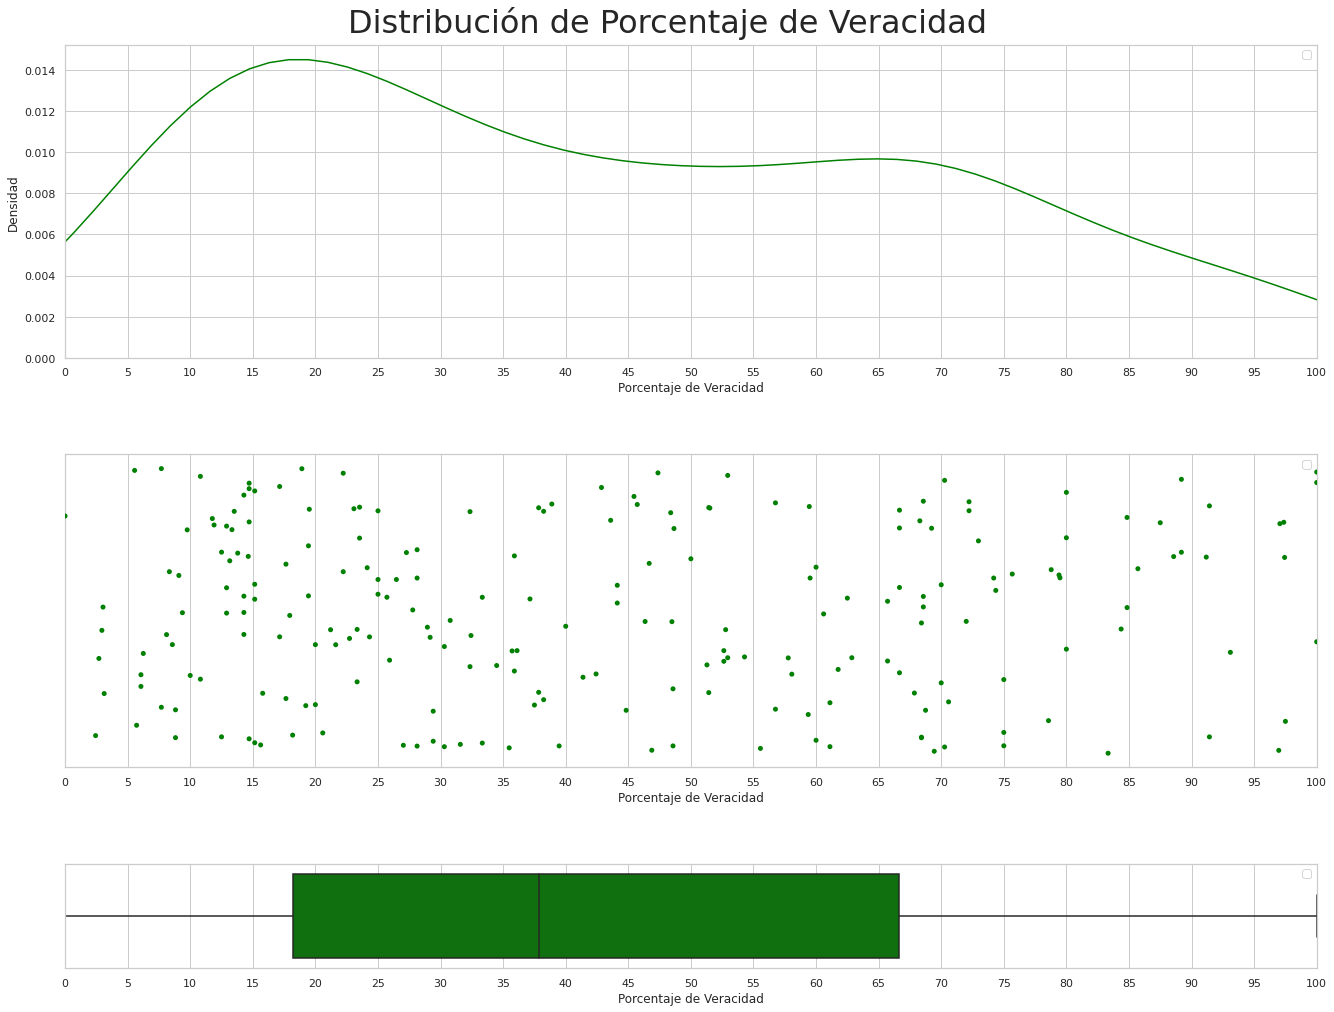

In [121]:
plot_densidad_ind(working_set, 'pct_veracidad', 'green', 100, 'Porcentaje de Veracidad', 5, "Distribución de Veracidad", 5.0)

In [22]:
#4.2 - VS plots

% Veracidad vs Frecuencia

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Frecuencia vs Porcentaje de Veracidad')

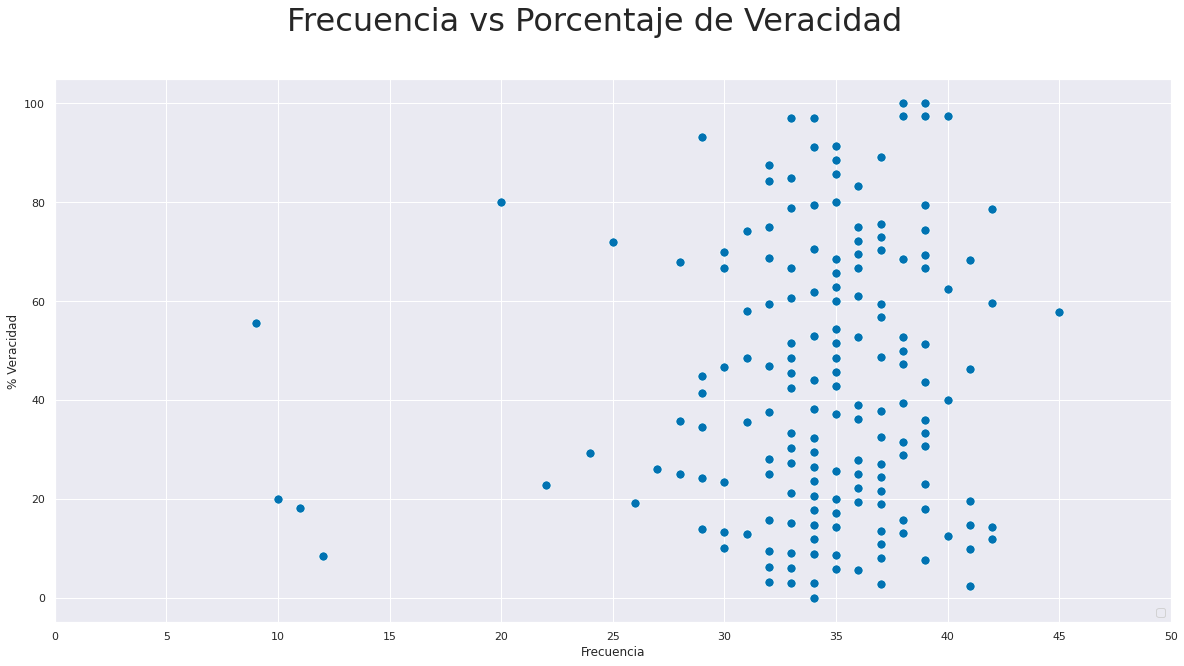

In [124]:
sns.set(style="darkgrid")

# Inicializacion
f, ax = plt.subplots(figsize=(20, 10))


# Plot
sns.set_color_codes("colorblind")
sns.scatterplot(x="frecuencia", y="pct_veracidad", data=working_set, color="b", s=85)


plt.xticks(np.arange(0, 51, 5)) 
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 50), ylabel="% Veracidad", xlabel="Frecuencia")
#sns.despine(left=True, bottom=True)
f.suptitle("Frecuencia vs Porcentaje de Veracidad", fontsize=32)

% Veracidad vs Largo de Keyword

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Largo de Keyword vs Porcentaje de Veracidad')

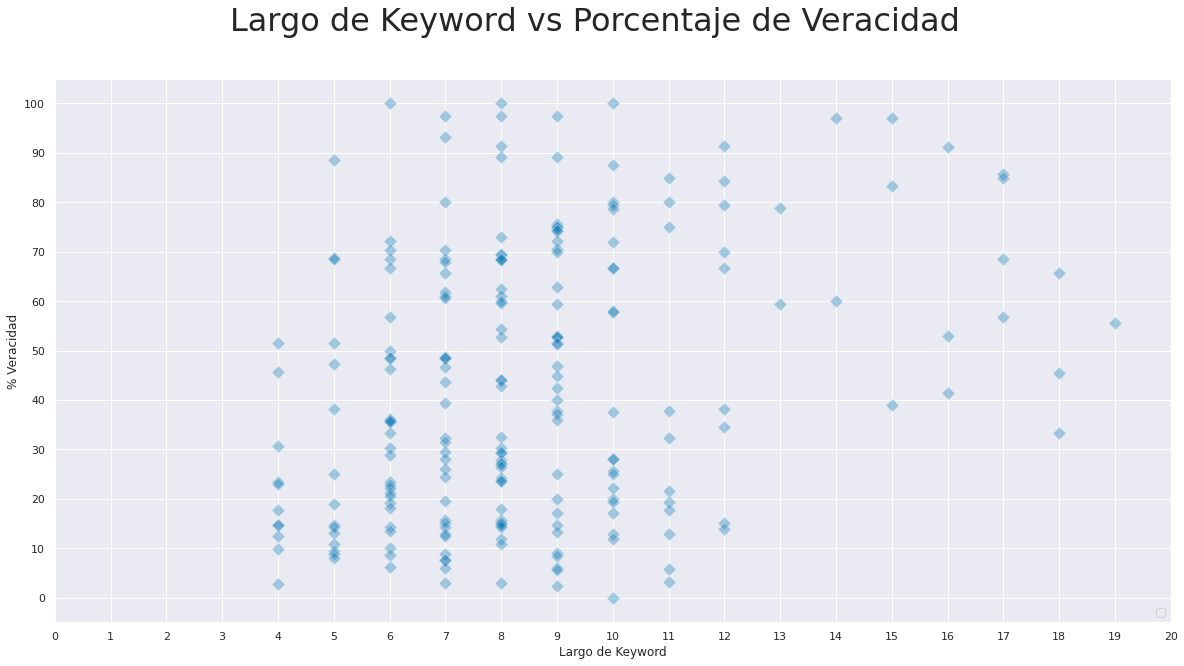

In [125]:
sns.set(style="darkgrid")

# Inicializacion
f, ax = plt.subplots(figsize=(20, 10))


# Plot
sns.set_color_codes("colorblind")
sns.scatterplot(x="longitud_kw", y="pct_veracidad", data=working_set, color="b", s=85, marker="D", alpha=0.333333)


plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0,101, 10))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20), ylabel="% Veracidad",xlabel="Largo de Keyword")
#sns.despine(left=True, bottom=True)
f.suptitle("Largo de Keyword vs Porcentaje de Veracidad", fontsize=32)

Frecuencia de Keyword vs Largo de Keyword

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Largo de Keyword vs Frecuencia de Keyword')

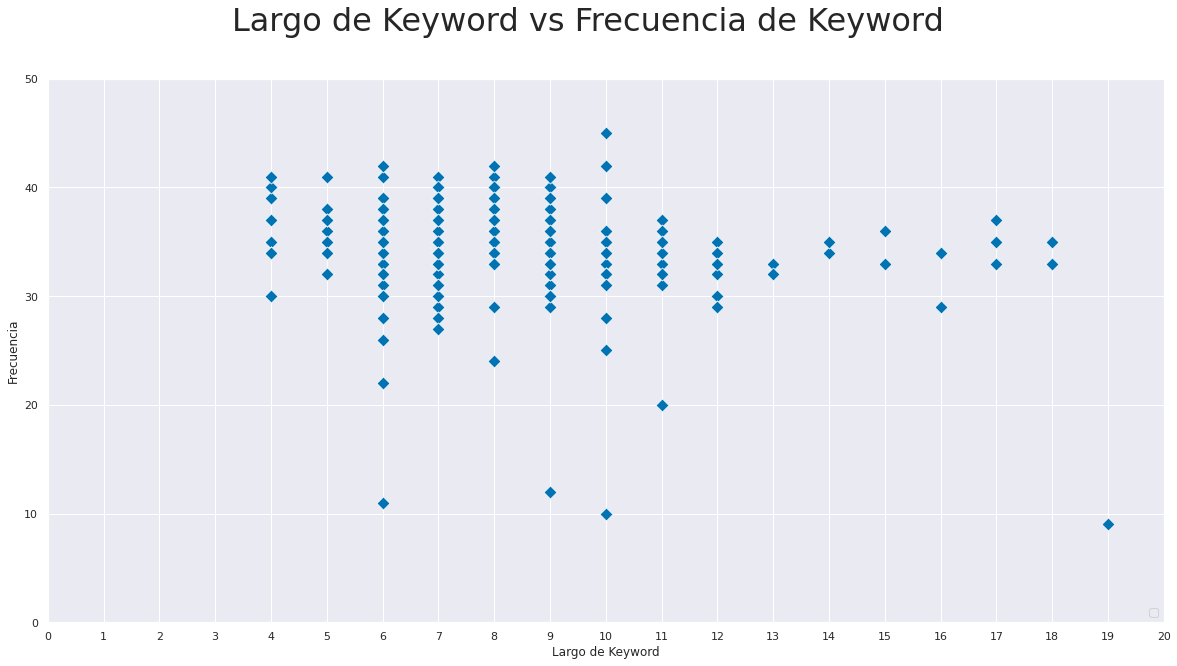

In [126]:
sns.set(style="darkgrid")

# Inicializacion
f, ax = plt.subplots(figsize=(20, 10))


# Plot
sns.set_color_codes("colorblind")
sns.scatterplot(x="longitud_kw", y="frecuencia", data=working_set, color="b", s=85, marker="D", alpha=1)


plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0,51, 10))
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 20), ylabel="Frecuencia", xlabel="Largo de Keyword")
#sns.despine(left=True, bottom=True)
f.suptitle("Largo de Keyword vs Frecuencia de Keyword", fontsize=32)

In [26]:
#4.3 Cantidades

In [27]:
def ploteo_cant_bar(df, columnx, columny, color, xlim, tick_step, xlabel, fig_height):
    sns.set(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(20, fig_height))


    # Plot the total crashes
    sns.set_color_codes("dark")
    sns.barplot(x=columnx, y=columny, data=df, label=columnx, color=color, alpha=0.7)

    plt.xticks(np.arange(0, xlim + 1, tick_step))
    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, xlim), ylabel="", xlabel=xlabel)
    sns.despine(left=True, bottom=True)

Keywords con maxima y minima frecuencia

In [28]:
working_set.sort_values(by='frecuencia',ascending=False, inplace=True)
top10freq = working_set.head(10)
last10freq = working_set.tail(10)

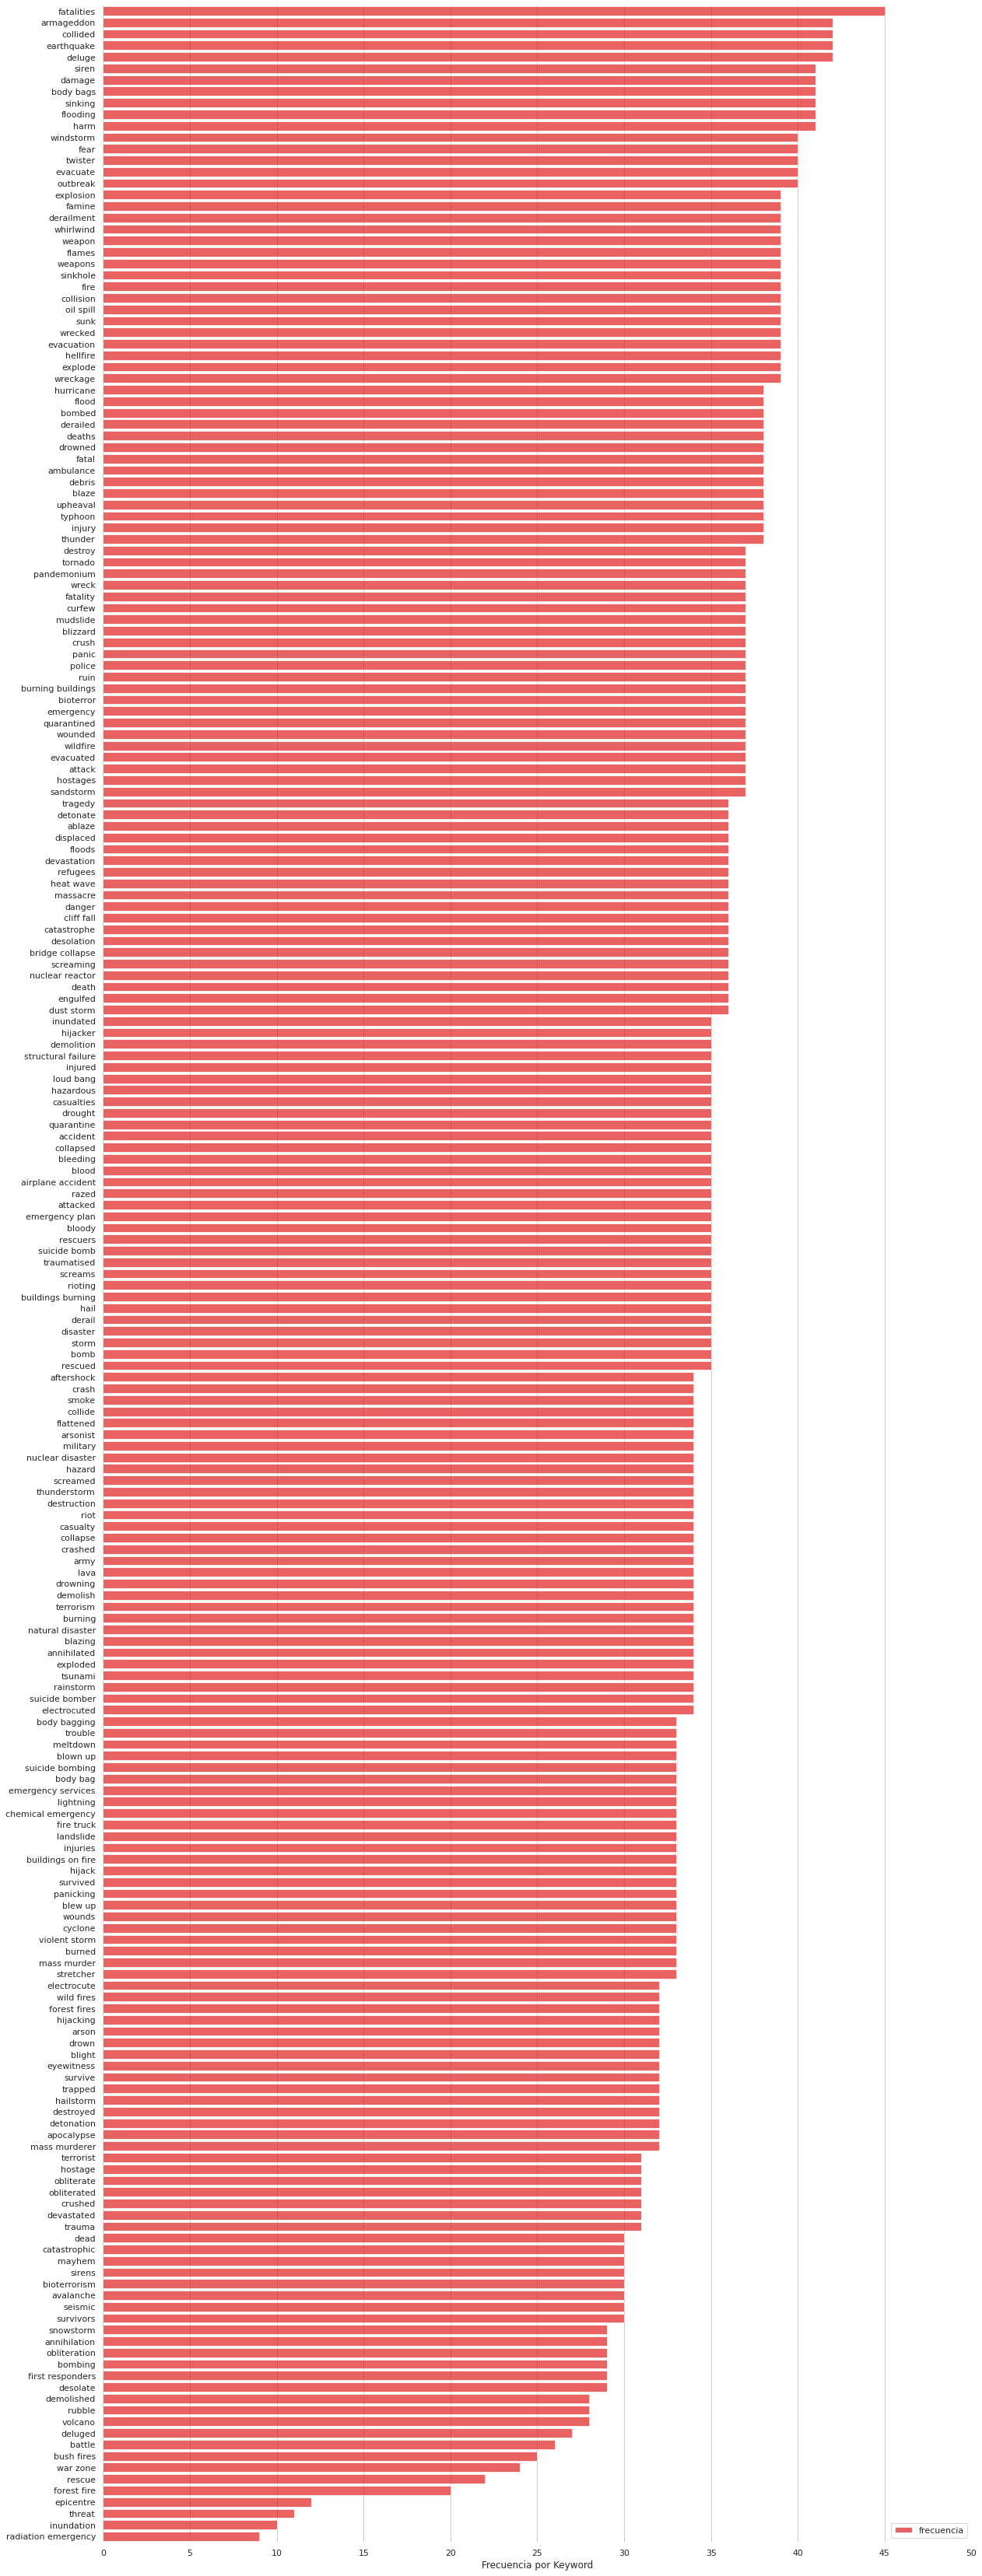

In [29]:
ploteo_cant_bar(working_set, 'frecuencia', 'keyword', 'red', 50, 5, "Frecuencia por Keyword", 60)

10 Keywords mas frecuentes

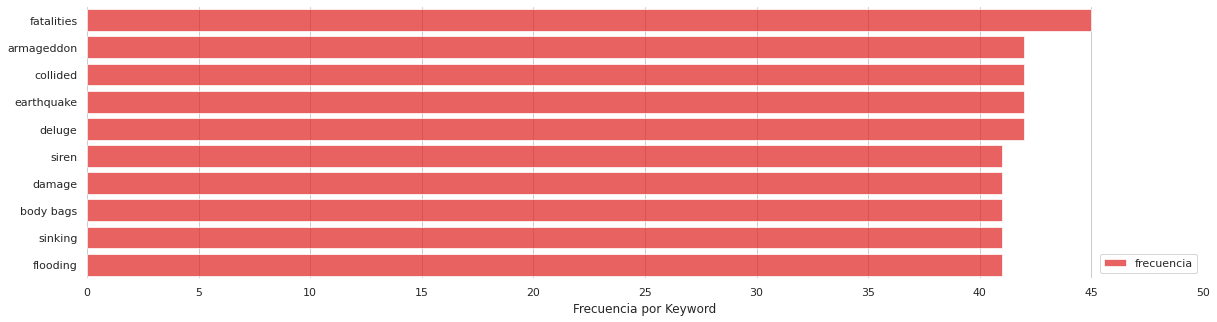

In [30]:
ploteo_cant_bar(top10freq, 'frecuencia', 'keyword', 'red', 50, 5, "Frecuencia por Keyword", 5)

10 Keywords menos frecuentes

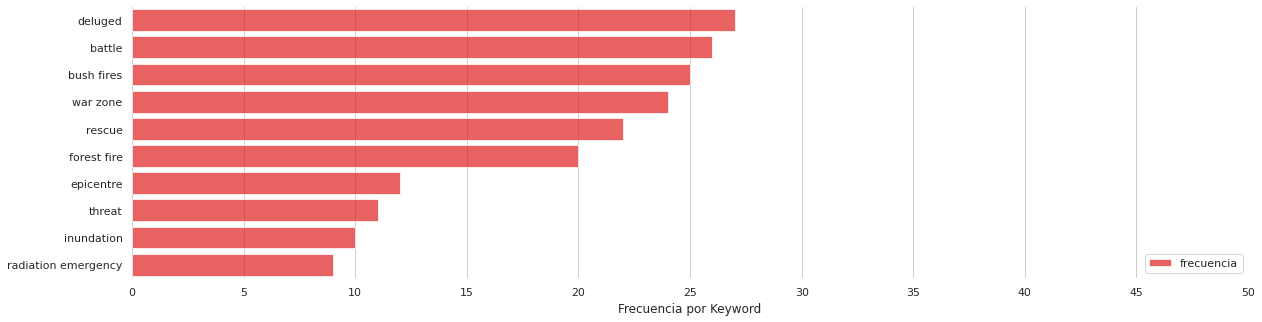

In [31]:
ploteo_cant_bar(last10freq, 'frecuencia', 'keyword', 'red', 50, 5, "Frecuencia por Keyword", 5)

Keywords con maximo y minimo porcentaje de Veracidad

In [108]:
working_set.sort_values(by='pct_veracidad',ascending=False, inplace=True)
mayor90 = working_set.loc[working_set['pct_veracidad']>90,:]
menor10 = working_set.loc[working_set['pct_veracidad']<=10,:]


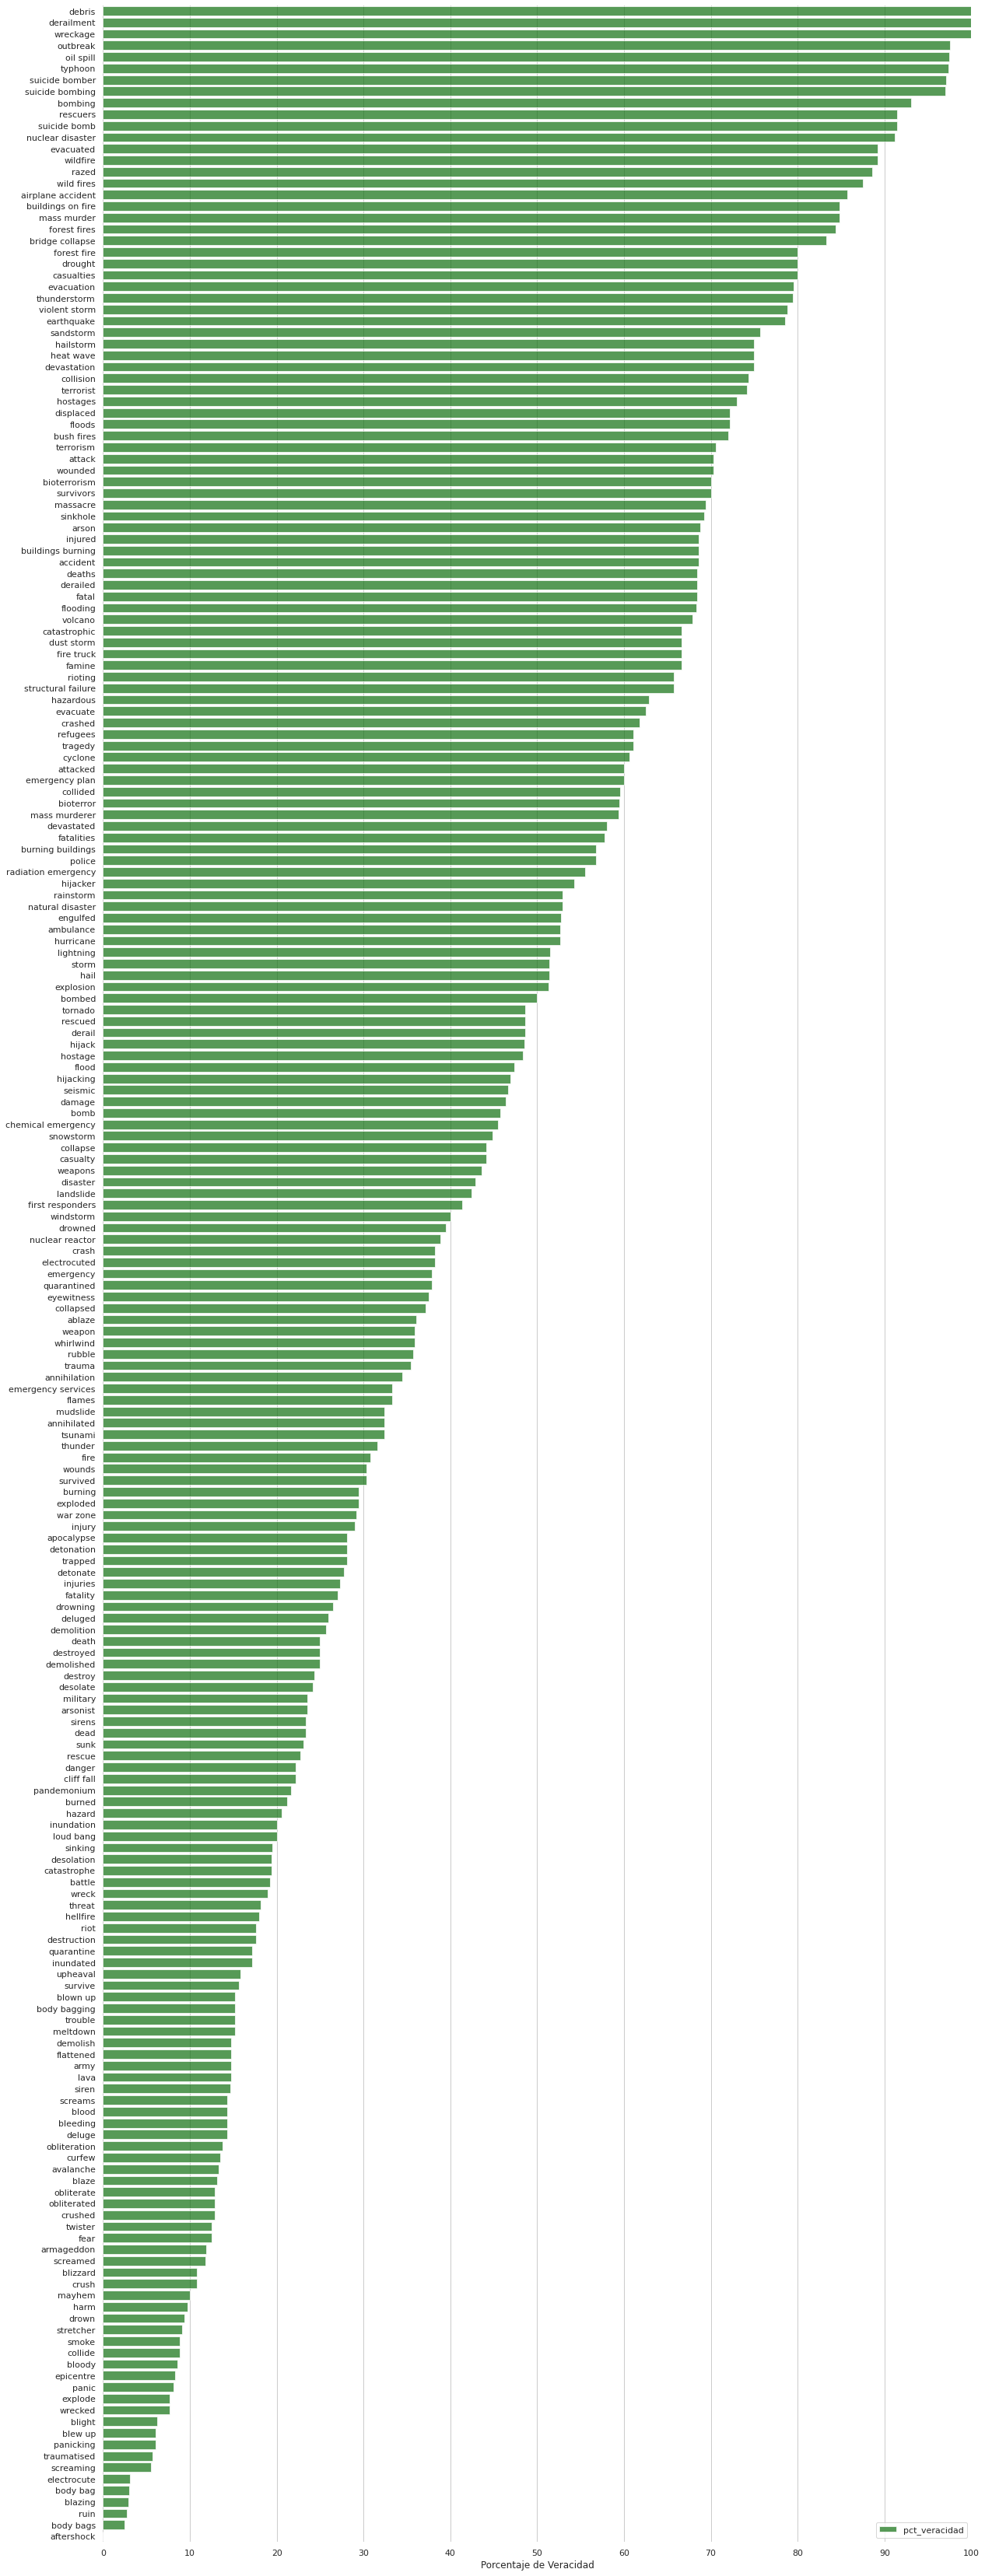

In [33]:
ploteo_cant_bar(working_set, 'pct_veracidad', 'keyword', 'green', 100, 10, "Porcentaje de Veracidad", 60)

Keywords con veracidad > 90%

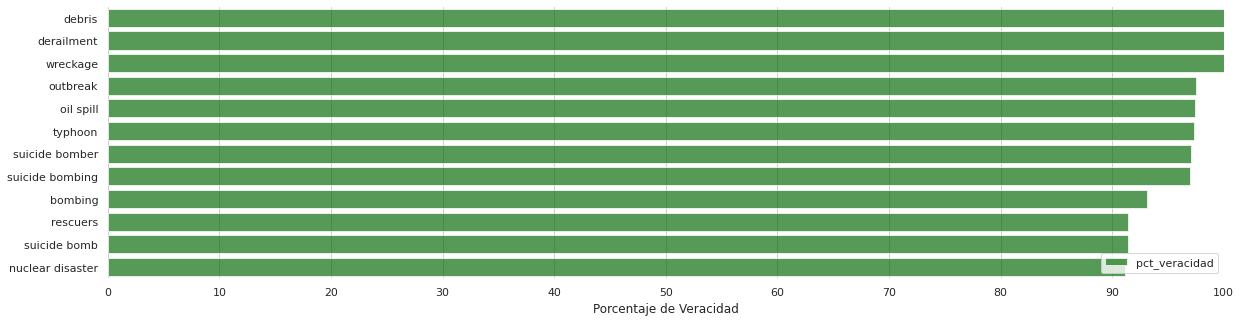

In [34]:
ploteo_cant_bar(mayor90, 'pct_veracidad', 'keyword', 'green', 100, 10, "Porcentaje de Veracidad", 5)

In [131]:
mayor90_melt = mayor90[['keyword','frecuencia','pct_veracidad']]
mayor90_melt = pd.melt(mayor90_melt,id_vars=['keyword'],value_vars=['frecuencia','pct_veracidad'])

Text(0.5, 0.98, 'Keywords con Veracidad 90% o más')

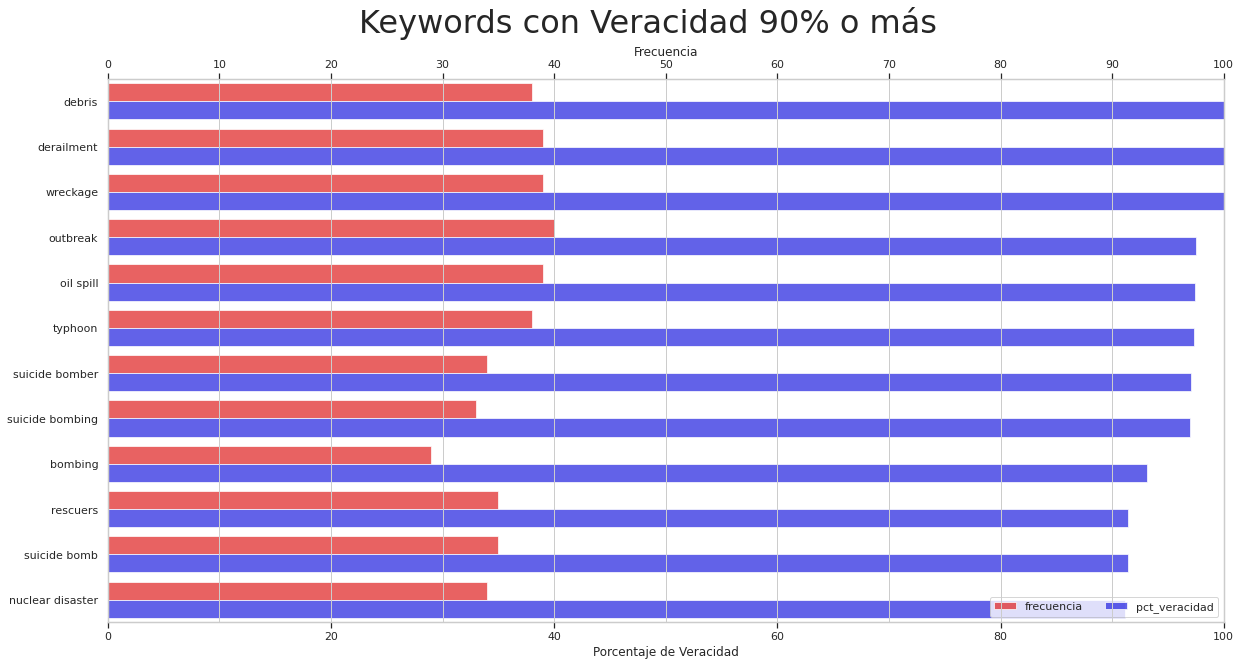

In [135]:
sns.set(style="whitegrid")

# Inicializacion
fig, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twiny()

# Plot
sns.set_color_codes("dark")
#menor10.pct_veracidad.plot(kind='bar',color='green',ax=ax, position=0)
#menor10.frecuencia.plot(kind='bar',color='blue', ax=ax2,position=1)
sns.barplot(x='value', y="keyword", data=mayor90_melt, hue='variable', alpha=0.7, ax=ax, palette=['red','blue'])
#sns.barplot(x='frecuencia', y="keyword", data=menor10, label="Frecuencia", color="red", alpha=0.7,ax=ax2)
plt.xticks(np.arange(0, 101, 10))

# Settings Eje
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="", xlabel='Porcentaje de Veracidad')

plt.xticks(np.arange(0, 101, 10))
ax2.set(xlim=(0, 100), ylabel="", xlabel='Frecuencia')

plt.xticks(np.arange(0, 101, 10))
fig.suptitle('Keywords con Veracidad 90% o más', fontsize=32)
#sns.despine(left=True, bottom=True)

Text(0.5, 0.98, 'Keywords con Veracidad 90% o mas')

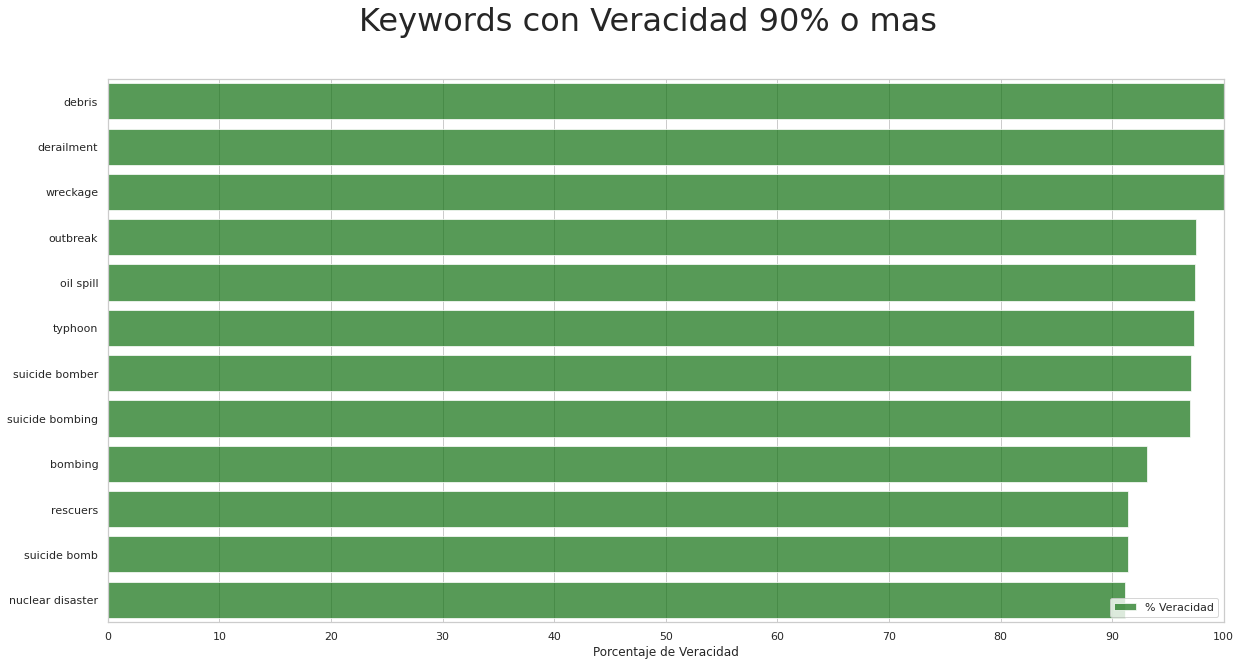

In [73]:
sns.set(style="whitegrid")

# Inicializacion
fig, ax = plt.subplots(figsize=(20, 10))


# Plot
sns.set_color_codes("dark")
sns.barplot(x='pct_veracidad', y="keyword", data=mayor90, label="% Veracidad", color="green", alpha=0.7)
plt.xticks(np.arange(0, 101, 10))

# Settings Eje
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="", xlabel='Porcentaje de Veracidad')
fig.suptitle('Keywords con Veracidad 90% o mas', fontsize=32)
#sns.despine(left=True, bottom=True)

Keywords con veracidad < 10%

In [109]:
menor10_melt = menor10[['keyword','frecuencia','pct_veracidad']]
menor10_melt = pd.melt(menor10_melt,id_vars=['keyword'],value_vars=['frecuencia','pct_veracidad'])

Text(0.5, 0.98, 'Keywords con Veracidad 10% o menor')

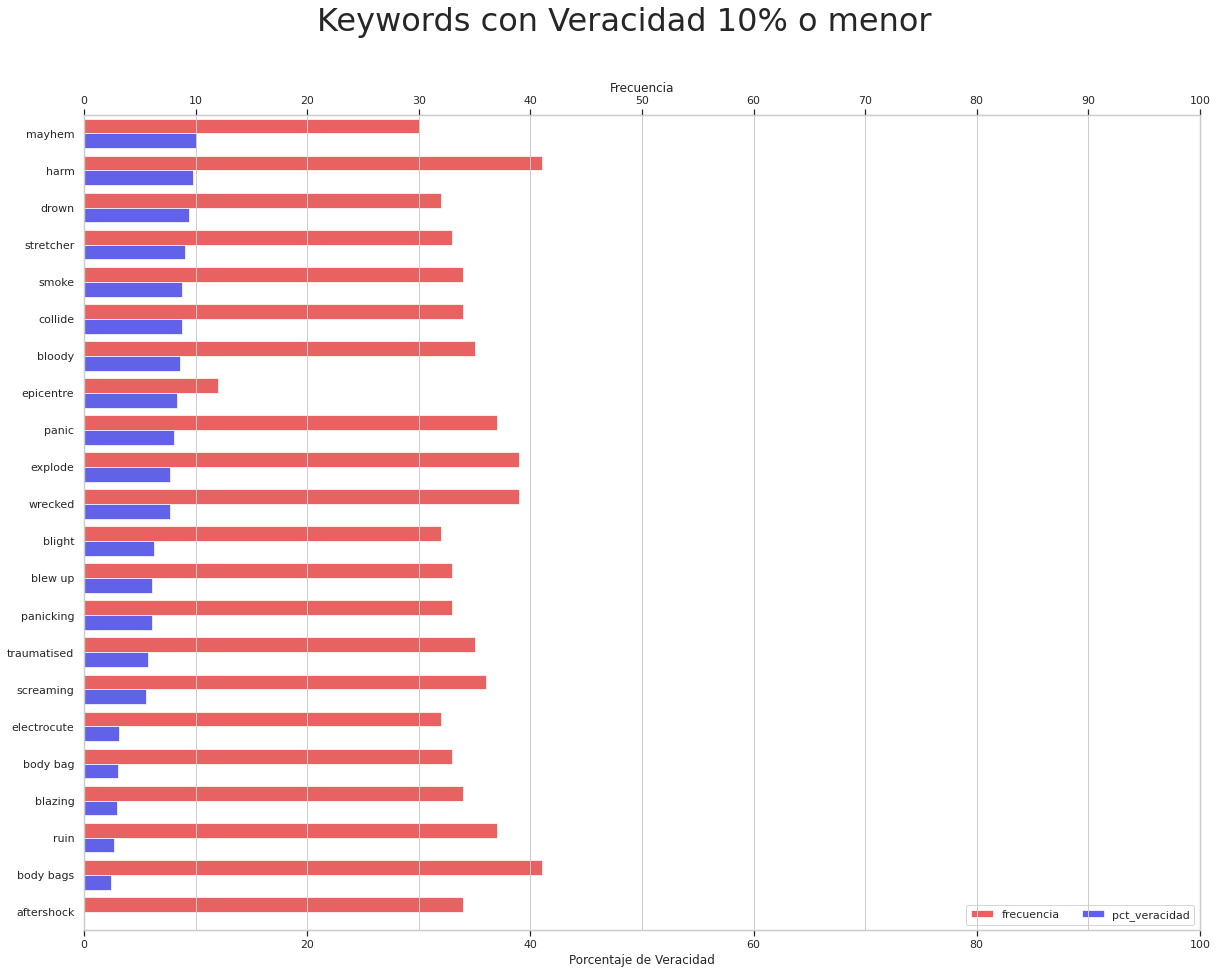

In [136]:
sns.set(style="whitegrid")

# Inicializacion
fig, ax = plt.subplots(figsize=(20, 15))
ax2 = ax.twiny()

# Plot
sns.set_color_codes("dark")
#menor10.pct_veracidad.plot(kind='bar',color='green',ax=ax, position=0)
#menor10.frecuencia.plot(kind='bar',color='blue', ax=ax2,position=1)
sns.barplot(x='value', y="keyword", data=menor10_melt, hue='variable', alpha=0.7, ax=ax, palette=['red','blue'])
#sns.barplot(x='frecuencia', y="keyword", data=menor10, label="Frecuencia", color="red", alpha=0.7,ax=ax2)
plt.xticks(np.arange(0, 101, 10))

# Settings Eje
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="", xlabel='Porcentaje de Veracidad')

plt.xticks(np.arange(0, 101, 10))
ax2.set(xlim=(0, 100), ylabel="", xlabel='Frecuencia')

plt.xticks(np.arange(0, 101, 10))
fig.suptitle('Keywords con Veracidad 10% o menor', fontsize=32)
#sns.despine(left=True, bottom=True)

In [36]:
#4.4 Primer vistazo al conjunto de keywords

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

lista_de_keywords = data['keyword']
lista_de_keywords.dropna(inplace=True)
lista_de_keywords = lista_de_keywords.str.replace(' ','')
a_texto= ' '.join([str(i) for i in lista_de_keywords])

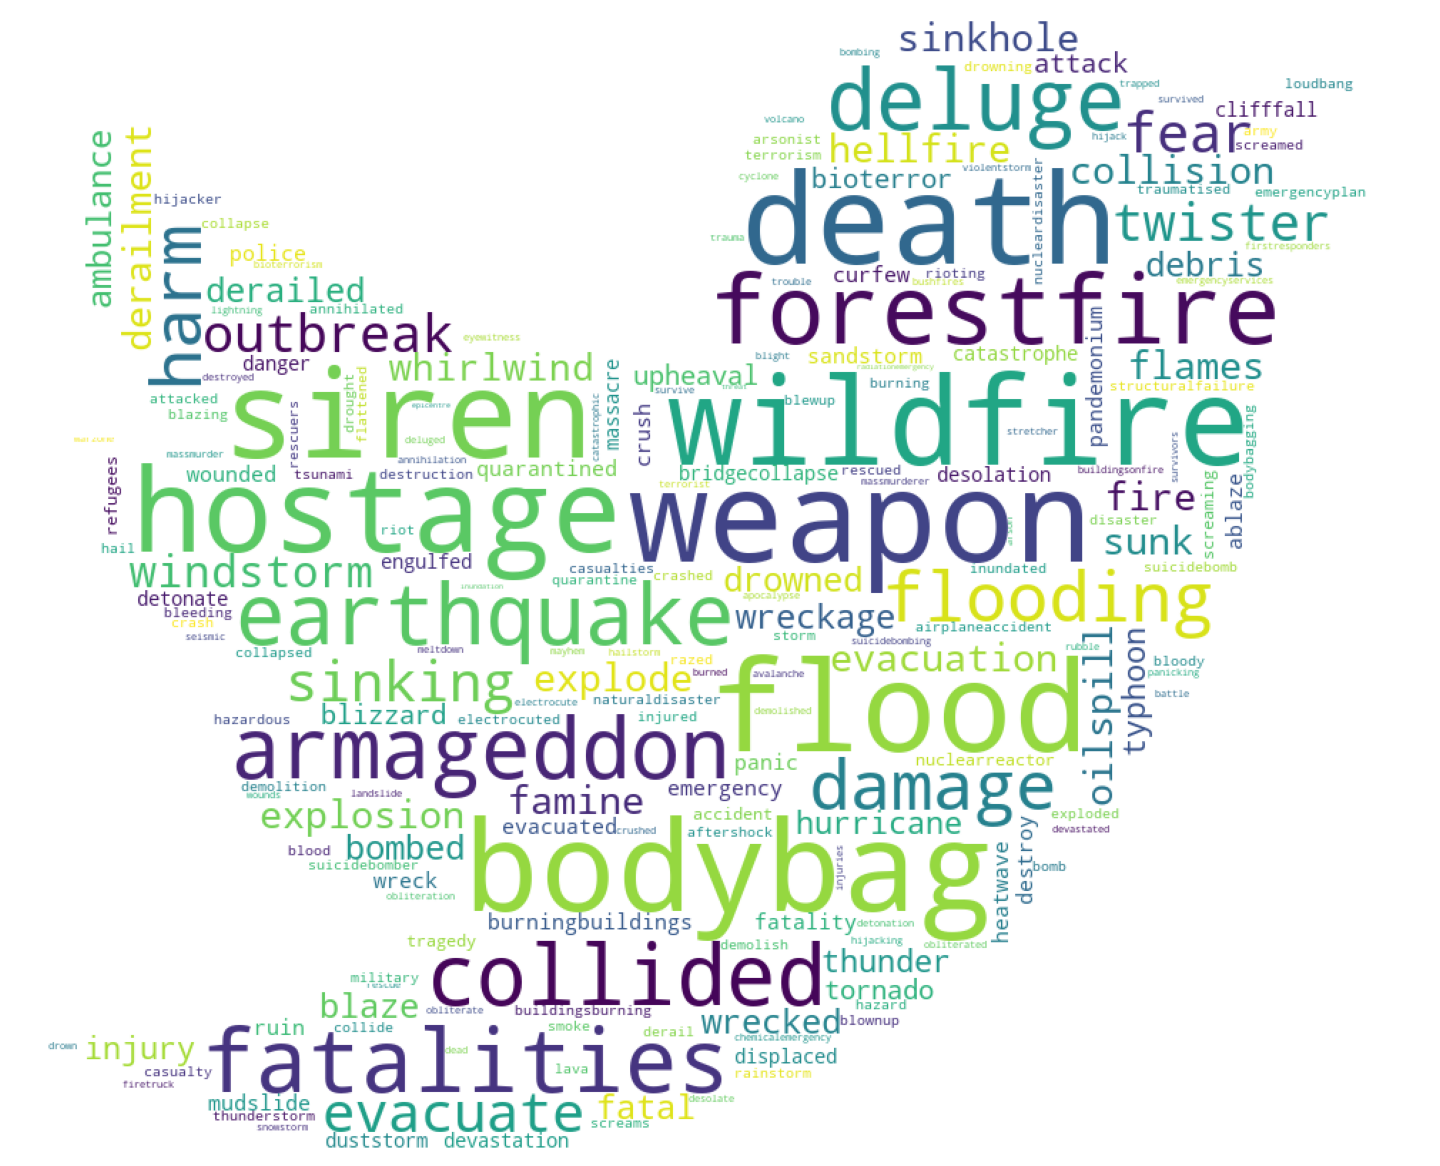

In [38]:
#fuera de programa
mask1 = np.array(Image.open('./twitter_mask.png'))
wc = WordCloud(width=1600,
               height=1400,
               background_color='white',
               max_words=250,
               max_font_size=90, 
               min_font_size=2,
               random_state=76,
               collocations = False, 
               mask = mask1)

wc.generate(a_texto)

plt.figure(figsize=(24,16))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)

Porcentaje de Veracidad segun complejidad de Keywords

In [39]:
compuestas = working_set.loc[working_set['keyword'].str.contains(" "),:]
simples = working_set.loc[working_set['keyword'].str.contains(" ")==False,:]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


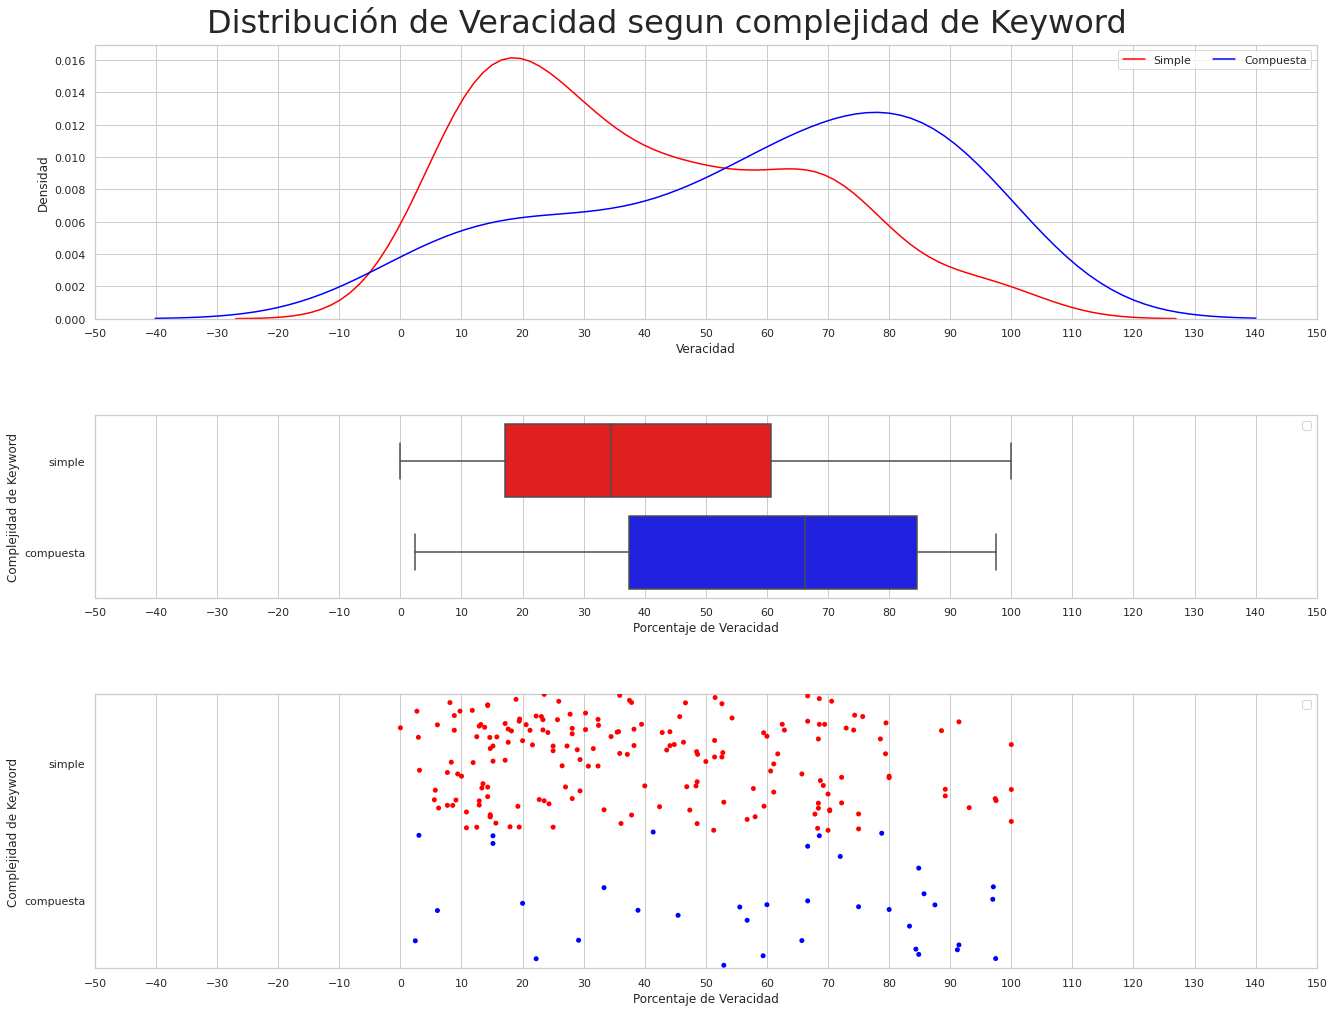

In [130]:
sns.set(style="whitegrid")

    # Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(20, 15),ncols=1, nrows=3, gridspec_kw={'height_ratios': [3, 2, 3]})

ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]


    # Plot 
sns.set_color_codes("dark")
sns.distplot(simples['pct_veracidad'], hist=False, kde=True, bins=int(50), color = 'red', hist_kws={'edgecolor':'black'}, ax=ax1, label="Simple")
sns.distplot(compuestas['pct_veracidad'], hist=False, kde=True, bins=int(50), color = 'blue', hist_kws={'edgecolor':'black'}, ax=ax1, label="Compuesta")


sns.stripplot(y='complejidad',x='pct_veracidad', data=working_set, orient='h',palette=['red','blue'], size=5, jitter=0.5, ax=ax3)
sns.boxplot(y='complejidad', x='pct_veracidad', data=working_set,palette=['red','blue'], ax=ax2)


ax1.legend(ncol=2, frameon=True)
ax1.set_xticks(np.arange(-50,  151, 10))
ax1.set(xlim=(-50, 150), ylabel="Densidad",xlabel="Veracidad")
#ax1.set_xticks(np.arange(0,  101, 10))
#ax1.set(xlim=(0, 100), ylabel="Densidad",xlabel="Veracidad")

ax2.legend(ncol=2, frameon=True)
ax2.set_xticks(np.arange(-50, 151, 10))
ax2.set(xlim=(-50, 150), ylabel="Complejidad de Keyword",xlabel="Porcentaje de Veracidad")
#ax2.set_xticks(np.arange(0, 101, 10))
#ax2.set(xlim=(0, 100), ylabel="Complejidad de Keyword",xlabel="Porcentaje de Veracidad")

ax3.legend(ncol=2, frameon=True)
ax3.set_xticks(np.arange(-50, 151, 10))
ax3.set(xlim=(-50, 150), ylabel="Complejidad de Keyword",xlabel="Porcentaje de Veracidad")
#ax3.set_xticks(np.arange(0, 101, 10))
#ax3.set(xlim=(0, 100), ylabel="Complejidad de Keyword",xlabel="Porcentaje de Veracidad")
fig.suptitle('Distribución de Veracidad segun complejidad de Keyword', fontsize=32)
fig.tight_layout(pad=5.0)
#sns.despine(left=True, bottom=True)